In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd   
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from matplotlib import pyplot

In [2]:
# Importing the dataset  
dataset = pd.read_csv('data.csv')   

dataset.drop(dataset.index[dataset['game'] == 'Divided'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Sustained'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Selective'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Focused'], inplace = True)

dataset.drop(dataset.index[dataset['child_age'] == 4], inplace = True)
dataset.drop(dataset.index[dataset['child_age'] == 5], inplace = True)

display(dataset)

,id,child_gender,child_age,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,diagnosis,percentage_no_of_correct_responses,oer,cer,game
22,23,2,6,19,19,0,0,1023,57000,No,100.000000,0.000000,0.000000,Alternating
23,24,1,6,19,19,0,0,1397,57000,No,100.000000,0.000000,0.000000,Alternating
24,25,1,6,19,19,10,0,961,57000,No,100.000000,0.000000,52.631579,Alternating
25,26,1,6,19,19,8,0,804,57000,No,100.000000,0.000000,42.105263,Alternating
26,27,1,6,19,19,11,0,1180,57000,No,100.000000,0.000000,57.894737,Alternating
27,28,1,6,19,18,2,1,994,57000,No,94.736842,5.263158,10.526316,Alternating
28,29,2,6,19,18,3,1,448,57000,No,94.736842,5.263158,15.789474,Alternating
29,29,2,6,19,18,7,1,733,57000,No,94.736842,5.263158,36.842105,Alternating
30,29,2,6,19,18,5,1,1083,57000,No,94.736842,5.263158,26.315789,Alternating
31,29,1,7,19,19,15,0,771,57000,No,100.000000,0.000000,78.947368,Alternating


In [3]:
# extracting only 11-comission & 12-omission
x = dataset.iloc[:, [7, 10, 11, 12]].values  
display(x)

array([[1023.        ,  100.        ,    0.        ,    0.        ],
       [1397.        ,  100.        ,    0.        ,    0.        ],
       [ 961.        ,  100.        ,    0.        ,   52.63157895],
       [ 804.        ,  100.        ,    0.        ,   42.10526316],
       [1180.        ,  100.        ,    0.        ,   57.89473684],
       [ 994.        ,   94.73684211,    5.26315789,   10.52631579],
       [ 448.        ,   94.73684211,    5.26315789,   15.78947368],
       [ 733.        ,   94.73684211,    5.26315789,   36.84210526],
       [1083.        ,   94.73684211,    5.26315789,   26.31578947],
       [ 771.        ,  100.        ,    0.        ,   78.94736842],
       [ 668.        ,   94.73684211,    5.26315789,   47.36842105],
       [ 838.        ,   89.47368421,   10.52631579,   47.36842105],
       [1338.        ,  100.        ,    0.        ,    0.        ],
       [1106.        ,  100.        ,    0.        ,    0.        ],
       [ 987.        ,   94.736842

In [4]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(new_df).describe()

display(new_df)


array([[ 0.17087754,  0.85125653, -0.85125653, -1.03606733],
       [ 1.72293381,  0.85125653, -0.85125653, -1.03606733],
       [-0.08641521,  0.85125653, -0.85125653,  1.11187713],
       [-0.73794686,  0.85125653, -0.85125653,  0.68228824],
       [ 0.82240918,  0.85125653, -0.85125653,  1.32667158],
       [ 0.05053093, -0.59587957,  0.59587957, -0.60647843],
       [-2.21530524, -0.59587957,  0.59587957, -0.39168399],
       [-1.03258856, -0.59587957,  0.59587957,  0.46749379],
       [ 0.41987052, -0.59587957,  0.59587957,  0.0379049 ],
       [-0.874893  ,  0.85125653, -0.85125653,  2.18584936],
       [-1.30233096, -0.59587957,  0.59587957,  0.89708268],
       [-0.59685083, -2.04301567,  2.04301567,  0.89708268],
       [ 1.47809071,  0.85125653, -0.85125653, -1.03606733],
       [ 0.51531784,  0.85125653, -0.85125653, -1.03606733],
       [ 0.02148175, -0.59587957,  0.59587957, -0.82127288],
       [ 0.82655907, -2.04301567,  2.04301567, -0.60647843],
       [ 0.8182593 ,  0.

In [5]:
x = dataset.iloc[:, [2, 7, 10, 11, 12]].copy()
x[['mean_reaction_time', 'percentage_no_of_correct_responses', 'oer', 'cer']] = new_df
x.head()
x = x.to_numpy()
display(x)


array([[ 6.        ,  0.17087754,  0.85125653, -0.85125653, -1.03606733],
       [ 6.        ,  1.72293381,  0.85125653, -0.85125653, -1.03606733],
       [ 6.        , -0.08641521,  0.85125653, -0.85125653,  1.11187713],
       [ 6.        , -0.73794686,  0.85125653, -0.85125653,  0.68228824],
       [ 6.        ,  0.82240918,  0.85125653, -0.85125653,  1.32667158],
       [ 6.        ,  0.05053093, -0.59587957,  0.59587957, -0.60647843],
       [ 6.        , -2.21530524, -0.59587957,  0.59587957, -0.39168399],
       [ 6.        , -1.03258856, -0.59587957,  0.59587957,  0.46749379],
       [ 6.        ,  0.41987052, -0.59587957,  0.59587957,  0.0379049 ],
       [ 7.        , -0.874893  ,  0.85125653, -0.85125653,  2.18584936],
       [ 7.        , -1.30233096, -0.59587957,  0.59587957,  0.89708268],
       [ 7.        , -0.59685083, -2.04301567,  2.04301567,  0.89708268],
       [ 7.        ,  1.47809071,  0.85125653, -0.85125653, -1.03606733],
       [ 7.        ,  0.51531784,  0.8

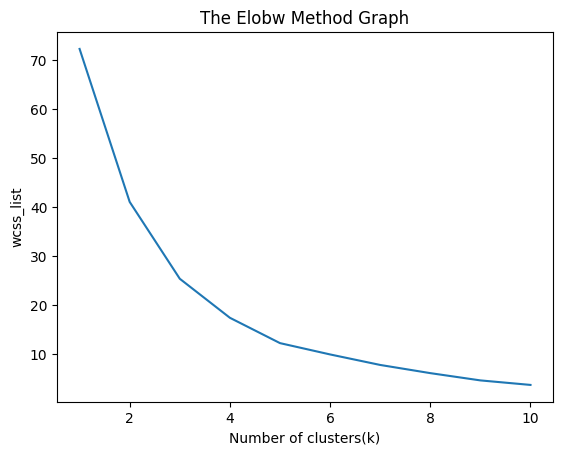

In [6]:
# Finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

In [7]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
print(y_predict)


[1 1 2 2 2 0 0 0 0 2 0 0 1 1 0 0 1]


In [8]:
# save the model to disk
import pickle
filename = 'modelaa2.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [9]:
new_df = dataset.iloc[:, [2, 7, 10, 11, 12]].copy()
new_df['clusters'] = y_predict
new_df.head()
display(new_df)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,cer,clusters
22,6,1023,100.000000,0.000000,0.000000,1
23,6,1397,100.000000,0.000000,0.000000,1
24,6,961,100.000000,0.000000,52.631579,2
25,6,804,100.000000,0.000000,42.105263,2
26,6,1180,100.000000,0.000000,57.894737,2
27,6,994,94.736842,5.263158,10.526316,0
28,6,448,94.736842,5.263158,15.789474,0
29,6,733,94.736842,5.263158,36.842105,0
30,6,1083,94.736842,5.263158,26.315789,0
31,7,771,100.000000,0.000000,78.947368,2


# Cluster Analysis

## Cluster 1

In [10]:
len(new_df[new_df["clusters"] == 0])

8

In [11]:
cluster_0 = new_df[new_df["clusters"] == 0 ]
display(cluster_0)
# cluster_0.boxplot(column =['CER'], grid = False)
# cluster_0.boxplot(column =['OER'], grid = False)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,cer,clusters
27,6,994,94.736842,5.263158,10.526316,0
28,6,448,94.736842,5.263158,15.789474,0
29,6,733,94.736842,5.263158,36.842105,0
30,6,1083,94.736842,5.263158,26.315789,0
32,7,668,94.736842,5.263158,47.368421,0
33,7,838,89.473684,10.526316,47.368421,0
36,7,987,94.736842,5.263158,5.263158,0
37,7,1181,89.473684,10.526316,10.526316,0


In [12]:
cluster_0 = new_df[new_df["clusters"] == 0 ]

maxVal = cluster_0['mean_reaction_time'].max()
minVal = cluster_0['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_0['percentage_no_of_correct_responses'].max()
minVal = cluster_0['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_0['oer'].max()
minVal = cluster_0['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)
print()

maxVal = cluster_0['cer'].max()
minVal = cluster_0['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

mean_reaction_time min -  448
mean_reaction_time max -  1181

percentage_no_of_correct_responses min -  89.47368421
percentage_no_of_correct_responses max -  94.73684211

oer min -  5.263157895
oer max -  10.52631579

cer min -  5.263157895
cer max -  47.36842105


## Cluster 2

In [13]:
len(new_df[new_df["clusters"] == 1])

5

In [14]:
cluster_1 = new_df[new_df["clusters"] == 1 ]
display(cluster_1)
#cluster_1.boxplot(column =['CER'], grid = False)
#cluster_1.boxplot(column =['OER'], grid = False)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,cer,clusters
22,6,1023,100.0,0.0,0.0,1
23,6,1397,100.0,0.0,0.0,1
34,7,1338,100.0,0.0,0.0,1
35,7,1106,100.0,0.0,0.0,1
38,7,1179,100.0,0.0,0.0,1


In [15]:
cluster_1 = new_df[new_df["clusters"] == 1 ]

maxVal = cluster_1['mean_reaction_time'].max()
minVal = cluster_1['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_1['percentage_no_of_correct_responses'].max()
minVal = cluster_1['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_1['oer'].max()
minVal = cluster_1['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)

print()

maxVal = cluster_1['cer'].max()
minVal = cluster_1['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

mean_reaction_time min -  1023
mean_reaction_time max -  1397

percentage_no_of_correct_responses min -  100.0
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  0.0

cer min -  0.0
cer max -  0.0


## Cluster 3

In [16]:
len(new_df[new_df["clusters"] == 2])

4

In [17]:
cluster_2 = new_df[new_df["clusters"] == 2 ]
display(cluster_2)
#cluster_2.boxplot(column =['CER'], grid = False)
#cluster_2.boxplot(column =['OER'], grid = False)

,child_age,mean_reaction_time,percentage_no_of_correct_responses,oer,cer,clusters
24,6,961,100.0,0.0,52.631579,2
25,6,804,100.0,0.0,42.105263,2
26,6,1180,100.0,0.0,57.894737,2
31,7,771,100.0,0.0,78.947368,2


In [18]:
cluster_2 = new_df[new_df["clusters"] == 2 ]

maxVal = cluster_2['mean_reaction_time'].max()
minVal = cluster_2['mean_reaction_time'].min()

print("mean_reaction_time min - ", minVal)
print("mean_reaction_time max - ", maxVal)
print()

maxVal = cluster_2['percentage_no_of_correct_responses'].max()
minVal = cluster_2['percentage_no_of_correct_responses'].min()

print("percentage_no_of_correct_responses min - ", minVal)
print("percentage_no_of_correct_responses max - ", maxVal)
print()

maxVal = cluster_2['oer'].max()
minVal = cluster_2['oer'].min()

print("oer min - ", minVal)
print("oer max - ", maxVal)

print()

maxVal = cluster_2['cer'].max()
minVal = cluster_2['cer'].min()

print("cer min - ", minVal)
print("cer max - ", maxVal)

mean_reaction_time min -  771
mean_reaction_time max -  1180

percentage_no_of_correct_responses min -  100.0
percentage_no_of_correct_responses max -  100.0

oer min -  0.0
oer max -  0.0

cer min -  42.10526316
cer max -  78.94736842
